**Seasonal Time Series Data of Electricity Production**

For over 3 years, I worked as a operation engineer in a 500MW powerplant and happen to see daily, weekly and monthly trends on electricity production in monitors of plant control room. These trends originate due to daily cycle of work, sleep and seasonal movements of weather and industrial activity.

For this analysis, time series dataset from the following [source](https://fred.stlouisfed.org/series/IPG2211A2N) is used. This dataset contains Industrial Production (IP) index which measures the real output electric utilities in United States.

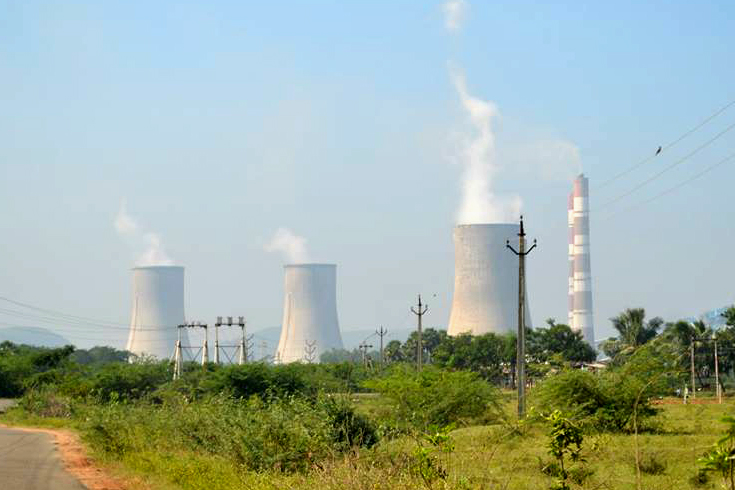

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('IPG2211A2N.csv',index_col=0)

In [3]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [4]:
df.index = pd.to_datetime(df.index) # Change index to date time from string
df.columns = ['Energy Production'] # Rename column name

In [5]:
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


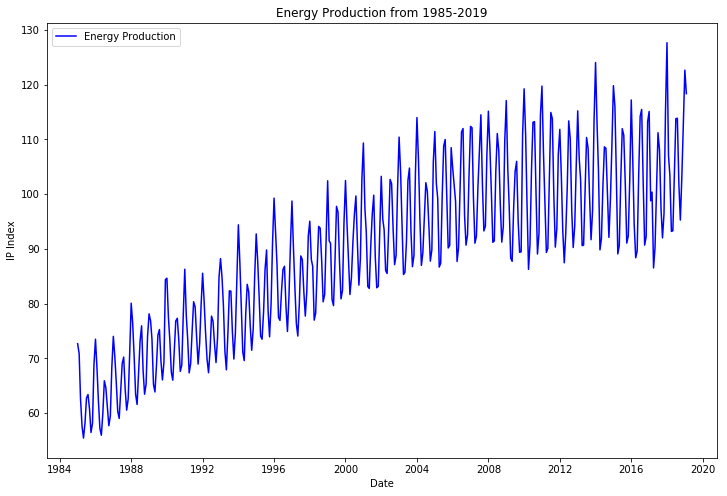

In [6]:
plt.figure(figsize=(12,8))  
plt.plot(df, color='blue', label='Energy Production')
plt.title('Energy Production from 1985-2019')
plt.xlabel('Date')  
plt.ylabel('IP Index') 
plt.legend()  
plt.show()

**Seasonal Decomposition**

Decomposition of data with stats model allows to notice trends and seasonal variation in data. Here general trend of increase is non-linear so 'multiplicative' model is suitable. 

After seasonal decomposition, it can be seen that general trend of electricity production is increasing and there is a strong seasonal variation. 

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

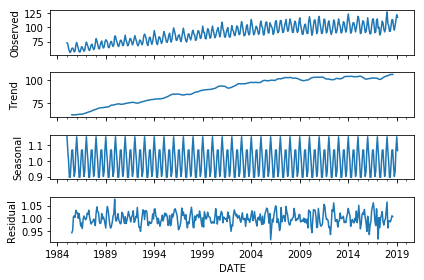

In [8]:
result = seasonal_decompose(df, model='multiplicative')
fig = result.plot()

Notes:

ARIMA stands for Auto Regressive Integrated Moving Average.

In an ARIMA model there are 3 parameters which model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

Seasonal ARIMA model has additional P,D,Q values for the Seasonal component.

The Akaike Information Critera (AIC) is a widely used measure of a statistical model. It basically quantifies 1) the goodness of fit, and 2) the simplicity/parsimony, of the model into a single statistic.



In [17]:
from pmdarima.arima import auto_arima
model = auto_arima(df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1869.777, BIC=1889.697, Fit time=0.854 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2115.507, BIC=2123.475, Fit time=0.029 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2042.381, BIC=2058.317, Fit time=0.260 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1917.831, BIC=1933.767, Fit time=0.311 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1870.427, BIC=1894.330, Fit time=1.439 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2014.606, BIC=2030.542, Fit time=0.601 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1867.479, BIC=1895.366, Fit time=4.789 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1915.923, BIC=1939.827, Fit time=2.076 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_orde

In [19]:
train = df.loc['1985-01-01':'2016-12-01']
test = df.loc['2017-01-01':]

In [28]:
test.shape

(26, 1)

In [20]:
model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [22]:
forecast = model.predict(n_periods=test.shape[0])

In [23]:
forecast

array([121.27769192, 109.70915678,  99.82138132,  89.86778114,
        91.49954102, 102.87266433, 112.84634638, 112.11837589,
       100.55800188,  91.2696189 ,  95.07559429, 110.92397993,
       120.05599213, 110.35680665, 101.206611  ,  89.68179949,
        91.4989165 , 102.41439771, 111.99264733, 110.80976421,
       100.35759243,  91.32364472,  95.50637522, 109.02380778,
       119.50655213, 110.36311046])

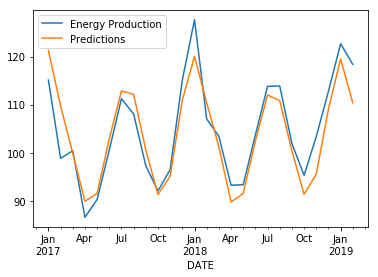

In [35]:
forecast = pd.DataFrame(forecast, index=test.index)
forecast.columns = ['Predictions']
pd.concat([test,forecast],axis=1).plot()

In [37]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test,forecast))
print(rms)

4.371212583028364


Reference: [Link1](https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c) and [Link2](https://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/)
    